In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date,datetime

In [ ]:
# !pip install iexfinance
import iexfinance
from iexfinance.stocks import get_historical_data

In [ ]:
start = datetime(2016,1,1)
end = date.today()
df = get_historical_data('AAPL',start=start, end=end, output_format='pandas',token='sk_899a93cf33454aae8ccf25c5f348b28f')

In [ ]:
apple_df = df.copy()

In [ ]:
apple_df.tail()

,close,high,low,open,symbol,volume,id,key,subkey,updated,changeOverTime,marketChangeOverTime,uOpen,uClose,uHigh,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
2021-05-17,126.27,126.93,125.17,126.82,AAPL,74244624,HISTORICAL_PRICES,AAPL,,1621299603000,40.6733,40.6733,126.82,126.27,126.93,125.17,74244624,126.82,126.27,126.93,125.17,74244624,"May 17, 21",-1.18,-0.0093
2021-05-18,124.85,126.99,124.78,126.56,AAPL,63342929,HISTORICAL_PRICES,AAPL,,1621385282000,40.2046,40.2046,126.56,124.85,126.99,124.78,63342929,126.56,124.85,126.99,124.78,63342929,"May 18, 21",-1.42,-0.0112
2021-05-19,124.69,124.915,122.86,123.16,AAPL,92611989,HISTORICAL_PRICES,AAPL,,1621471681000,40.1518,40.1518,123.16,124.69,124.915,122.86,92611989,123.16,124.69,124.915,122.86,92611989,"May 19, 21",-0.16,-0.0013
2021-05-20,127.31,127.72,125.1,125.23,AAPL,76857123,HISTORICAL_PRICES,AAPL,,1621558085000,41.0165,41.0165,125.23,127.31,127.72,125.1,76857123,125.23,127.31,127.72,125.1,76857123,"May 20, 21",2.62,0.021
2021-05-21,125.43,128,125.21,127.82,AAPL,79295436,HISTORICAL_PRICES,AAPL,,1621646161000,40.396,40.396,127.82,125.43,128,125.21,79295436,127.82,125.43,128,125.21,79295436,"May 21, 21",-1.88,-0.0148


In [ ]:
apple_df.shape

(1355, 25)

In [ ]:
from sklearn.model_selection import train_test_split

prices = apple_df[['close']]
prices.reset_index(level=0, inplace=True)
prices.rename(columns={'index':'datetime'},inplace=True)
prices['ts'] = prices.datetime.values.astype(np.int64) // (10 ** 9)
prices = prices.drop(['datetime'], axis=1)

dataset = prices.values
X = dataset[:,1].reshape(-1,1)
Y = dataset[:,0]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.15, random_state=7)
prices.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,close,ts
0,26.3375,1451865600
1,25.6775,1451952000
2,25.175,1452038400
3,24.1125,1452124800
4,24.24,1452211200


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

num_folds = 10
scoring = "r2"

models = []
models.append((' LR ', LinearRegression()))
models.append((' LASSO ', Lasso()))
models.append((' EN ', ElasticNet()))
models.append((' KNN ', KNeighborsRegressor()))
models.append((' CART ', DecisionTreeRegressor()))
models.append((' SVR ', SVR()))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 LR : 0.781553 (0.022333)
 LASSO : 0.781553 (0.022333)
 EN : 0.781553 (0.022333)
 KNN : 0.998299 (0.000403)
 CART : 0.998172 (0.000539)
 SVR : 0.963630 (0.005077)


1.5615196565686262


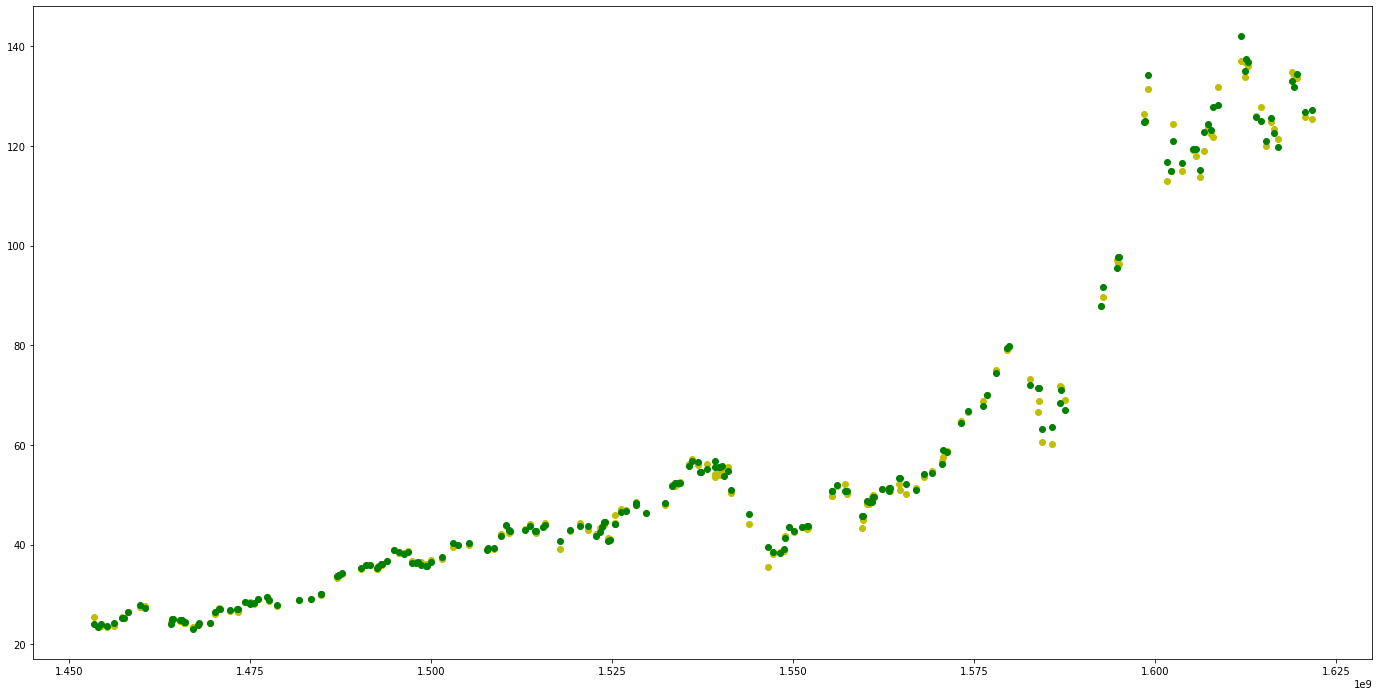

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor()

model.fit(X_train, Y_train)

predictions = model.predict(X_validation)
print(mean_squared_error(Y_validation, predictions))

fig= plt.figure(figsize=(24,12))
plt.plot(X_validation,Y_validation,'yo')
plt.plot(X_validation,predictions,'go')
plt.show()